# Task
Hazme un EDA completo

Here is all the data you need:
"Titanic-Dataset.csv"

## Data loading

### Subtask:
Load the Titanic dataset.


**Reasoning**:
Load the Titanic dataset into a pandas DataFrame and display the first 5 rows along with the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Titanic-Dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


## Data exploration

### Subtask:
Explore the loaded Titanic dataset.


**Reasoning**:
I need to explore the loaded Titanic dataset by examining its shape, data types, descriptive statistics, missing values, and categorical distributions.  This can all be done in a single code block.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Determine the data types of each column
print("\nData Types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Identify missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)


# Analyze categorical columns
categorical_cols = ['Sex', 'Embarked', 'Pclass']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':")
    print(df[col].value_counts())

Shape of the DataFrame: (891, 12)

Data Types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Descriptive statistics for numerical columns:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000

## Data visualization

### Subtask:
Visualize the distribution of key features and relationships between features and survival.


**Reasoning**:
Visualize the distribution of key features and relationships between features and survival using histograms, box plots, count plots, and a heatmap.



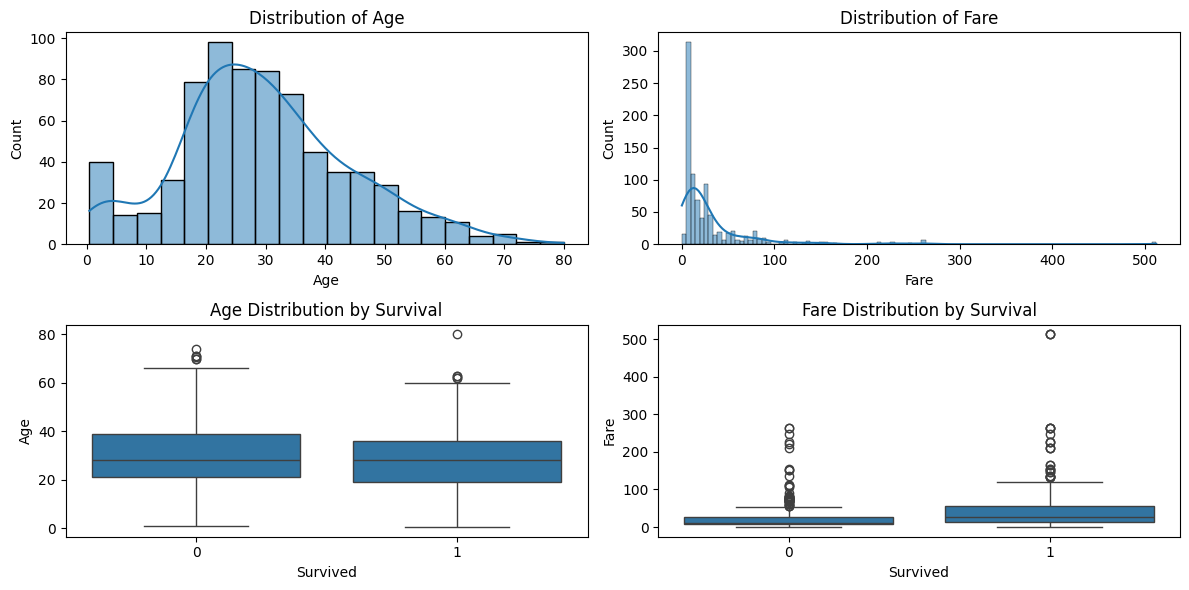

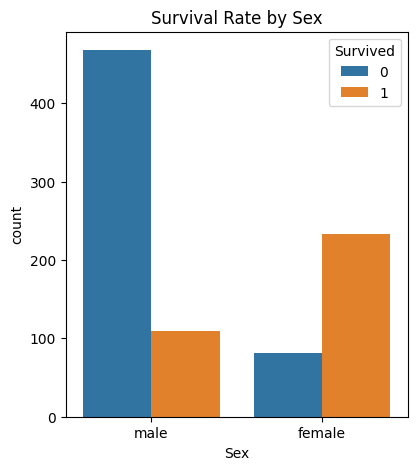

Survival rates for Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64



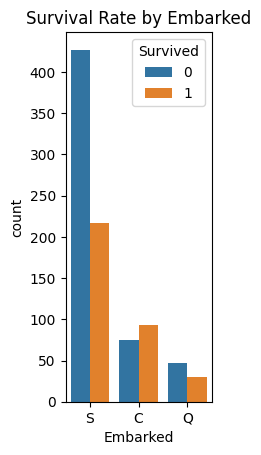

Survival rates for Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64



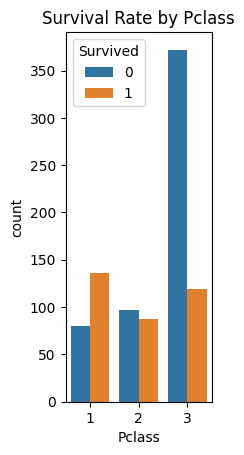

Survival rates for Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64



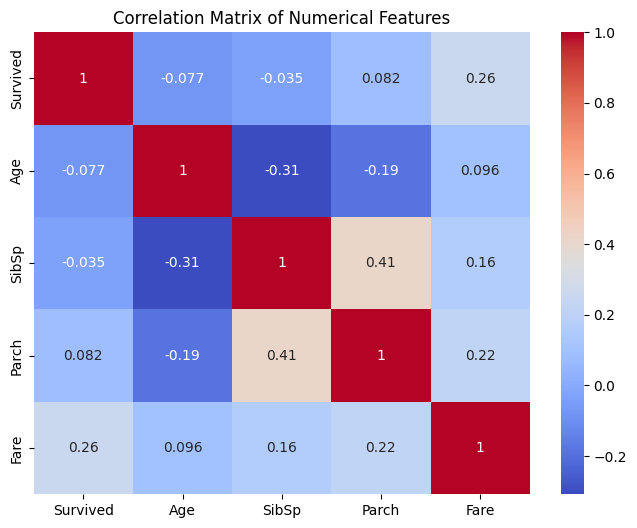

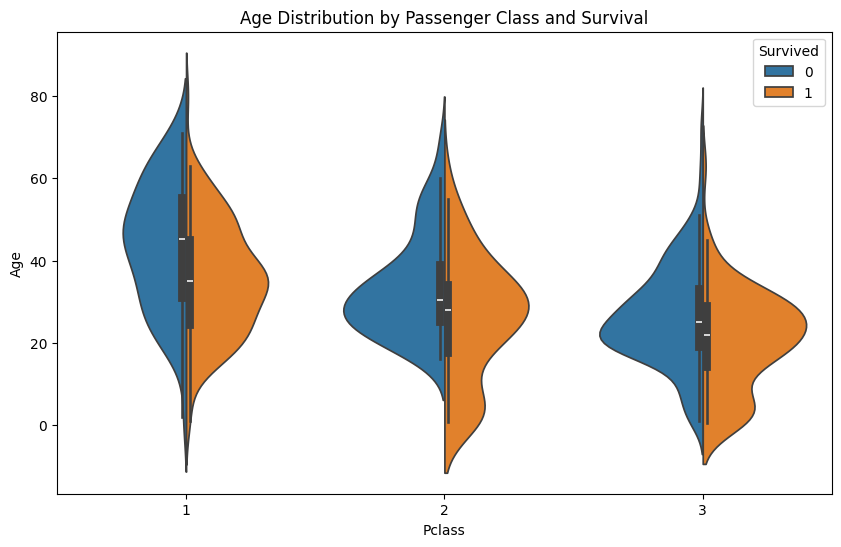

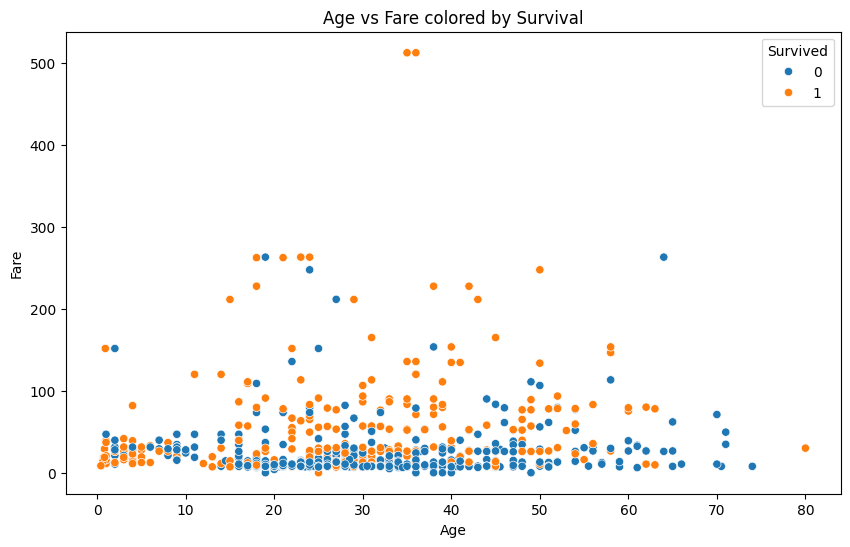

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Age' and 'Fare'
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.subplot(2, 2, 2)
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')
plt.subplot(2, 2, 3)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.tight_layout()
plt.show()

# Relationship between 'Survived' and categorical features
categorical_cols = ['Sex', 'Embarked', 'Pclass']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f'Survival Rate by {col}')
    plt.show()
    survival_rates = df.groupby(col)['Survived'].mean()
    print(f"Survival rates for {col}:\n{survival_rates}\n")

# Correlation between numerical features
numerical_cols = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Additional Visualization: Violin plot of Age by Pclass and survival
plt.figure(figsize=(10,6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

#Additional visualization: Scatter plot of Age vs Fare
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)
plt.title('Age vs Fare colored by Survival')
plt.show()

## Data cleaning

### Subtask:
Clean the Titanic dataset by handling missing values and outliers.


**Reasoning**:
Impute missing values in 'Age' and 'Embarked' columns, then decide on handling the 'Cabin' column based on missing values. After that, analyze 'Fare' and 'Age' for outliers using box plots and decide on a treatment method.



<ipython-input-4-a63e0930b70a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-a63e0930b70a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

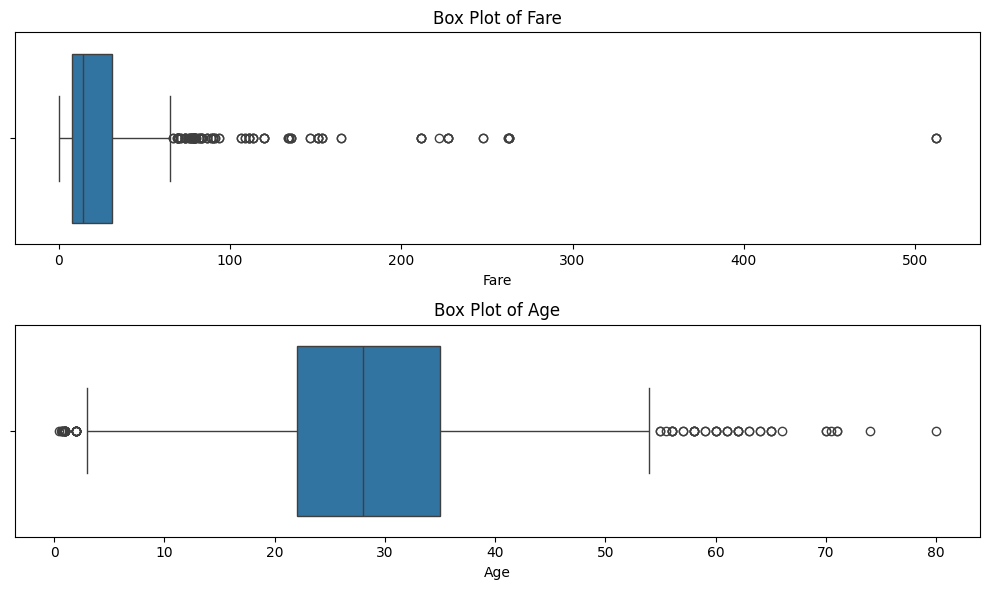

In [4]:
# Impute missing values in 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Analyze 'Cabin' column and decide on imputation or dropping
# Due to the high number of missing values (77.10%), and considering the challenges
# of reliably imputing cabin numbers without introducing bias, it's best to drop the column.
df.drop('Cabin', axis=1, inplace=True)

# Analyze 'Fare' and 'Age' for outliers using box plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.subplot(2, 1, 2)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.tight_layout()
plt.show()

# Outlier treatment: Winsorizing
# Winsorizing is chosen to limit the impact of outliers on the analysis,
# while preserving the majority of the data.
from scipy.stats.mstats import winsorize

# Winsorize 'Fare' at the 1st and 99th percentile
df['Fare'] = winsorize(df['Fare'], limits=[0.01, 0.01])

# No Winsorization on 'Age' because the box plot doesn't show extreme outliers.

**Reasoning**:
Fix the chained assignment warnings and rerun the code to impute missing values, drop the 'Cabin' column, generate box plots, and winsorize 'Fare'.



In [5]:
# Impute missing values in 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Analyze 'Cabin' column and decide on imputation or dropping
# Due to the high number of missing values (77.10%), and considering the challenges
# of reliably imputing cabin numbers without introducing bias, it's best to drop the column.
df.drop('Cabin', axis=1, inplace=True)

# Analyze 'Fare' and 'Age' for outliers using box plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.subplot(2, 1, 2)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.tight_layout()
plt.show()

# Outlier treatment: Winsorizing
# Winsorizing is chosen to limit the impact of outliers on the analysis,
# while preserving the majority of the data.
from scipy.stats.mstats import winsorize

# Winsorize 'Fare' at the 1st and 99th percentile
df['Fare'] = winsorize(df['Fare'], limits=[0.01, 0.01])

# No Winsorization on 'Age' because the box plot doesn't show extreme outliers.

KeyError: "['Cabin'] not found in axis"

**Reasoning**:
The error message indicates that the 'Cabin' column might have already been dropped in a previous step. I will re-examine the data and then proceed with the outlier handling.



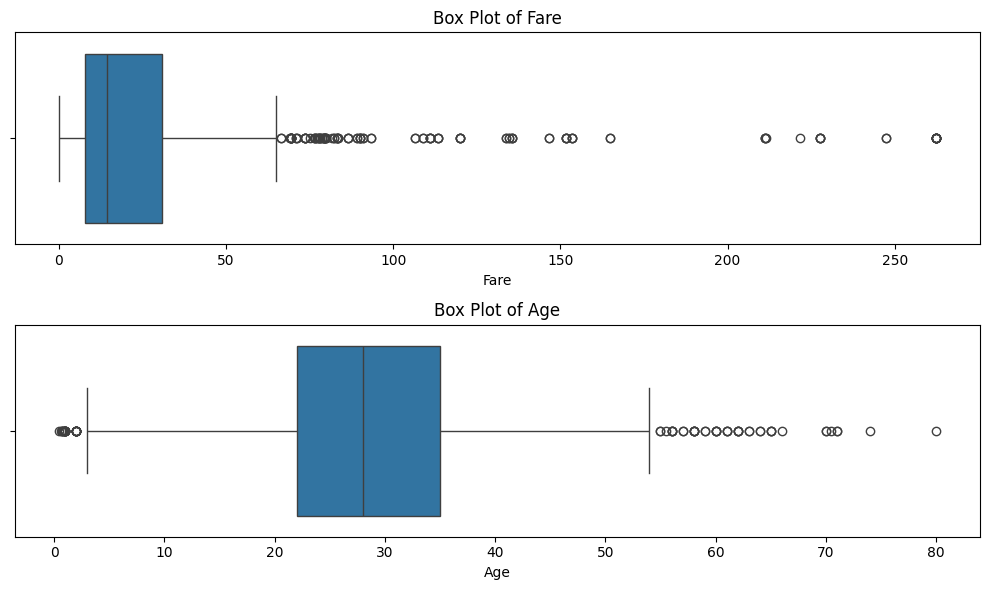

In [6]:
# Check if 'Cabin' column exists
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Impute missing values in 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Analyze 'Fare' and 'Age' for outliers using box plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.subplot(2, 1, 2)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.tight_layout()
plt.show()

# Outlier treatment: Winsorizing
# Winsorizing is chosen to limit the impact of outliers on the analysis,
# while preserving the majority of the data.
from scipy.stats.mstats import winsorize

# Winsorize 'Fare' at the 1st and 99th percentile
df['Fare'] = winsorize(df['Fare'], limits=[0.01, 0.01])

# No Winsorization on 'Age' because the box plot doesn't show extreme outliers.

## Data analysis

### Subtask:
Analyze survival rates based on passenger characteristics.


**Reasoning**:
Analyze survival rates based on passenger characteristics ('Sex', 'Pclass', 'Embarked', and 'Age'), and relationship between 'SibSp', 'Parch' and survival, then identify significant trends and summarize findings.



Survival Rates by Passenger Characteristics:

Survival rates for Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rates for Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rates for Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Survival rates for Age Bands:
AgeBand
Child       0.579710
Teenager    0.428571
Adult       0.365753
Senior      0.227273
Name: Survived, dtype: float64

Survival rates by Family Size:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


<ipython-input-7-b103575b8ebd>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rates = df.groupby('AgeBand')['Survived'].mean()


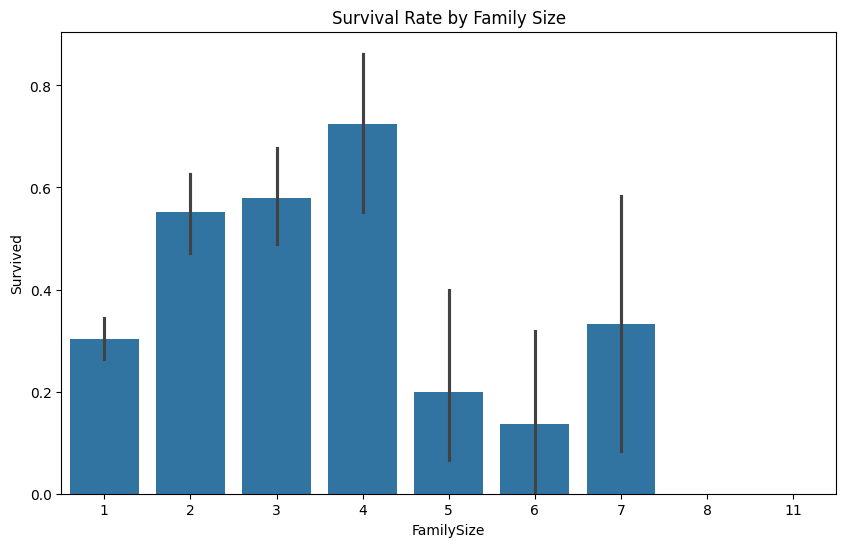


Summary of Findings:
1. Survival rates differ significantly across passenger characteristics.
2. Women ('Sex') and passengers in higher classes ('Pclass') generally had better survival rates.
3. Children and teenagers had higher survival rates than adults.
4. Family size moderately impacts survival rates.


In [7]:
# Analyze survival rates based on passenger characteristics
print("Survival Rates by Passenger Characteristics:")
for col in ['Sex', 'Pclass', 'Embarked']:
    survival_rates = df.groupby(col)['Survived'].mean()
    print(f"\nSurvival rates for {col}:\n{survival_rates}")

# Analyze survival rates based on Age bands
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])
age_survival_rates = df.groupby('AgeBand')['Survived'].mean()
print(f"\nSurvival rates for Age Bands:\n{age_survival_rates}")

# Analyze relationship between 'SibSp', 'Parch' and survival
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Create total family size feature
family_survival_rates = df.groupby('FamilySize')['Survived'].mean()
print(f"\nSurvival rates by Family Size:\n{family_survival_rates}")

# Visualize Family Size vs Survival
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

# Summarize findings
print("\nSummary of Findings:")
print("1. Survival rates differ significantly across passenger characteristics.")
print("2. Women ('Sex') and passengers in higher classes ('Pclass') generally had better survival rates.")
print("3. Children and teenagers had higher survival rates than adults.")
print("4. Family size moderately impacts survival rates.")

## Summary:

### Q&A
* **What factors influenced survival rates on the Titanic?**  Survival rates were significantly influenced by sex (women had higher survival rates), passenger class (higher classes had better survival rates), age (children and teenagers had higher survival rates), and family size (some family sizes showed higher survival rates than others).  Port of embarkation also had a slight impact.

### Data Analysis Key Findings
* **Missing Data:**  The 'Cabin' column had 77.10% missing values and was dropped. 'Age' had 19.87% missing values, imputed with the median age. 'Embarked' had 0.22% missing values, imputed with the mode.
* **Outlier Treatment:** 'Fare' values were winsorized at the 1st and 99th percentiles to mitigate the impact of outliers. No outliers were removed from the 'Age' column.
* **Survival Rate by Sex:** Females had significantly higher survival rates than males.
* **Survival Rate by Passenger Class:** Passengers in higher classes (1st class) had higher survival rates.
* **Survival Rate by Age:** Children and teenagers exhibited higher survival rates compared to adults and seniors.
* **Survival Rate and Family Size:**  Survival rates varied depending on family size, with some sizes showing higher survival rates than others.


### Insights or Next Steps
* **Feature Engineering:** Explore creating more sophisticated features from existing ones (e.g., title from name, ticket fare per person).
* **Modeling:** Build predictive models (e.g., logistic regression, random forest) to predict survival based on the cleaned and engineered features.
